In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

import warnings
warnings.simplefilter("ignore")

In [3]:
# Loading the dataset
data_one = pd.read_csv("/content/data/small_vocab_en-lg.csv")

In [ ]:
shuffled_df = data_one.sample(frac=1)
shuffled_df.to_csv("new_file_name.csv", index=False)
data = pd.read_csv("/content/new_file_name.csv")

In [4]:
data.head(10)

,Text,Language
0,Abanoonyiboobubudamu bonna baasabiddwa beewand...,Luganda
1,Baayise olukungaana lw'abanoonyiboobubudamu eg...,Luganda
2,Abanoonyiboobubudamu b'abadde n'obutakkaanya w...,Luganda
3,Twakubirizibwa okwaniriza abanoonyiboobubudamu...,Luganda
4,Bwe tukolera awamu enkulaakulana enyingi efuni...,Luganda
5,Disitulikiti eziriraanye ensalo si ntebenkevu.,Luganda
6,Abanoonyiboobubudamu batandise okulima okusobo...,Luganda
7,Kimenya mateeka okubeera n'emmundu.,Luganda
8,Awa nnyo bazadde be kitiibwa.,Luganda
9,Omusajja anywa nnyo omwenge.,Luganda


In [5]:
# value count for each language
data["Language"].value_counts()

English    3377
Luganda    3049
Name: Language, dtype: int64

In [6]:
# separating the independent and dependant features
X = data["Text"]
y = data["Language"]

In [7]:
# converting categorical variables to numerical

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Text Preprocessing

In [8]:
data.isnull().sum()

Text        0
Language    0
dtype: int64

In [9]:
data_list = []
for text in X:
    text = re.sub(r'[!@#$(),\n"%^*?\:;~`0-9]', ' ', text)
    text = re.sub(r'[[]]', ' ', text)
    text = text.lower()
    data_list.append(text)

# Bag of Words

In [10]:
# creating bag of words using countvectorizer

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()

In [11]:
X.shape

(6426, 9241)

# Train Test Split

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# Model creation and Prediction


In [13]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [14]:
# prediction 
y_pred = model.predict(x_test)

# prediction 


In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

In [16]:
print("Accuracy is :",ac)

Accuracy is : 1.0


In [17]:
# classification report
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       661
           1       1.00      1.00      1.00       625

    accuracy                           1.00      1286
   macro avg       1.00      1.00      1.00      1286
weighted avg       1.00      1.00      1.00      1286



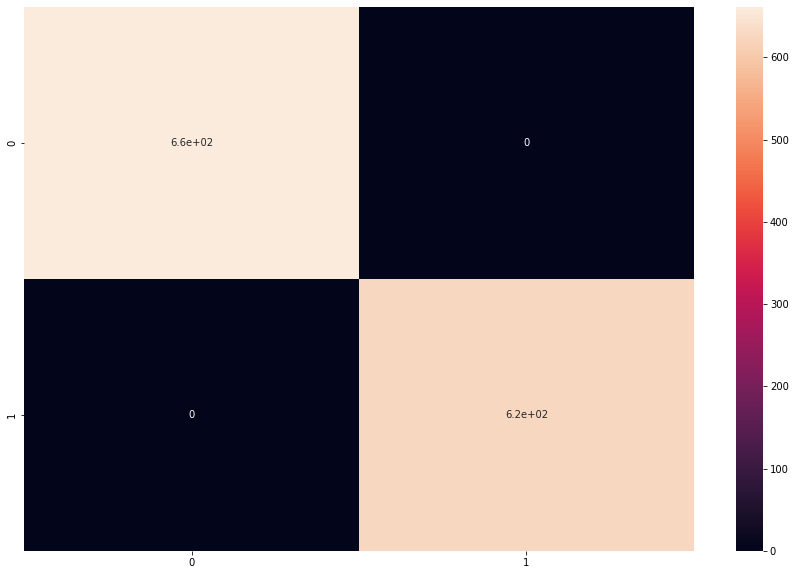

In [18]:
# visualising the confusion matrix
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

In [19]:
def predict(text):
     x = cv.transform([text]).toarray() # converting text to bag of words model (Vector)
     lang = model.predict(x) # predicting the language
     lang = le.inverse_transform(lang) # finding the language corresponding the the predicted value
     print("The langauge is in",lang[0]) # printing the language

In [22]:
predict('Obumenyi bw’amateeka bufuukidde Pulezidenti n’eggwanga ekizibu.')

The langauge is in Luganda


In [ ]:
import pickle

#
# Create your model here (same as above)
#

# Save to file in the current working directory
pkl_filename = "pickle_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)

# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)